In [1]:
from Dataset_v1 import Dataset_v1
from Model_v1 import Model_v1
from Analysis import FeatureAnalysis 
from ModelEval import ModelEval
import pandas as pd
import numpy as np

In [2]:
dataset = Dataset_v1("data/train_data_new.csv","data/test_data_new.csv",False)
dataset.build_features_into_dataset()

features_for_training = [
    #"n_past_podiums_last_5",
    "Qual_Position",
    #"ewa_driver_results",
    "driver_encoding",
    "Race_Time_Encoding",
    "Qual_Q3_Time_Normal",
    #"pos_gained_encoding_simple",
    #"n_past_podiums",
    #"pos_gained_encoding",
    #"TopTeam_Red Bull Racing",
    #"TopTeam_Ferrari",
    #"TopTeam_McLaren",
    #"Sprint_Race_Position",
    #"Sprint_Qual_Position",
    #"TopTeam_Mercedes"
]

dataset.set_features_for_training(features_for_training)

model = Model_v1(dataset,"RF_trn",False)
model.train()
print(model.get_feature_importance())


Features for training set:
 ['Qual_Position', 'driver_encoding', 'Race_Time_Encoding', 'Qual_Q3_Time_Normal']

Dataset Shapes
(1068, 4) (1068,)
(236, 4) (236,)
(133, 4) (133,)


Finding best threshold...
Precision: 0.5370370370370371
Recall: 0.8055555555555556
F1 score: 0.651685393258427
Best PR threshold: 0.6203619429179831


FPR: 0.21
TPR: 0.9444444444444444
Best ROC threshold: 0.4134637104031684


Best threshold: 0.6203619429179831
Threshold set to: 0.6203619429179831
               feature  importance
0        Qual_Position    0.513242
1      driver_encoding    0.298800
3  Qual_Q3_Time_Normal    0.129250
2   Race_Time_Encoding    0.058708


In [4]:
model_eval = ModelEval(model,dataset)
model_eval_df = model_eval.get_df()

In [5]:
model_eval_df.shape

(1304, 7)

In [9]:
model_eval_df.loc[(model_eval_df["Year"]==2024) & (model_eval_df["Round_Number"]==1),:]

,Round_Number,Year,Location,Driver,Actual,Predicted,Probability
834,1,2024,Sakhir,M VERSTAPPEN,1,1,0.976394
844,1,2024,Sakhir,C LECLERC,0,1,0.911366
836,1,2024,Sakhir,S PEREZ,1,1,0.880770
837,1,2024,Sakhir,C SAINZ,1,1,0.776603
835,1,2024,Sakhir,G RUSSELL,0,1,0.731847
840,1,2024,Sakhir,L NORRIS,0,0,0.306279
843,1,2024,Sakhir,L STROLL,0,0,0.200263
832,1,2024,Sakhir,F ALONSO,0,0,0.147926
849,1,2024,Sakhir,O PIASTRI,0,0,0.070349
831,1,2024,Sakhir,V BOTTAS,0,0,0.061846


In [7]:
model_eval_df.loc[(model_eval_df["Year"]==2025) & (model_eval_df["Round_Number"]==1),:]

,Round_Number,Year,Location,Driver,Actual,Predicted,Probability


In [13]:
data[["BroadcastName","Qual_Q3_Time_Normal","Qual_Position","Standardized_Time","Race_Time_Encoding","Race_Position"]].head(20).sort_values(by="Race_Time_Encoding")

,BroadcastName,Qual_Q3_Time_Normal,Qual_Position,Standardized_Time,Race_Time_Encoding,Race_Position
12,M VERSTAPPEN,0.286,2.0,-1.000,9.467975,18.0
2,C LECLERC,0.000,1.0,0.000,9.533259,1.0
1,V BOTTAS,-1.000,12.0,68.439,9.994759,8.0
4,S PEREZ,0.372,3.0,20.524,10.081612,2.0
3,Y TSUNODA,-1.000,13.0,-1.000,10.140225,15.0
15,C SAINZ,1.540,9.0,-1.000,10.152964,20.0
9,F ALONSO,-1.000,10.0,-1.000,10.208543,17.0
5,M SCHUMACHER,-1.000,15.0,-1.000,10.555725,13.0
18,L STROLL,-1.000,20.0,88.598,11.009100,12.0
6,A ALBON,-1.000,16.0,79.382,11.283839,10.0


In [11]:
data.loc[data["BroadcastName"]=="M VERSTAPPEN",["BroadcastName","Qual_Q3_Time_Normal","Qual_Position","Standardized_Time","Race_Time_Encoding","Race_Position"]]

,BroadcastName,Qual_Q3_Time_Normal,Qual_Position,Standardized_Time,Race_Time_Encoding,Race_Position
12,M VERSTAPPEN,0.286,2.0,-1.000,9.467975,18.0
35,M VERSTAPPEN,0.000,1.0,0.000,8.998427,1.0
42,M VERSTAPPEN,0.195,3.0,0.000,8.647727,1.0
62,M VERSTAPPEN,0.323,2.0,0.000,8.319348,1.0
95,M VERSTAPPEN,0.290,4.0,1.491,8.011766,3.0
102,M VERSTAPPEN,0.347,3.0,0.000,7.882695,1.0
135,M VERSTAPPEN,0.000,1.0,0.000,7.557603,1.0
140,M VERSTAPPEN,0.072,2.0,18.777,7.267818,7.0
174,M VERSTAPPEN,0.000,1.0,1.532,9.525107,2.0
185,M VERSTAPPEN,0.304,2.0,0.000,8.590807,1.0


In [8]:
analysis = FeatureAnalysis(dataset)
feature_ranking = analysis.select_features()
feature_ranking

Non numeric features:
 ['BroadcastName', 'TeamName', 'Country', 'Location']


,Correlation,Precision,Separation_Score,AUROC,Lasso_Weight
n_past_podiums_last_5,0.546921,0.550267,1.495159e+10,0.853930,0.000000
Qual_Position,0.507847,0.279542,1.918096e+10,0.091140,-0.000000
driver_encoding,0.493803,0.368625,1.525850e+10,0.140456,-0.000000
ewa_driver_results,0.493049,0.211341,1.620309e+10,0.136262,-0.000000
TopTeam_Red Bull Racing,0.492598,3.695755,1.093631e+10,0.707014,0.000000
n_past_podiums,0.479837,0.001056,1.146007e+10,0.852307,0.000000
pos_gained_encoding,0.409372,0.513460,8.891945e+09,0.756133,0.000000
pos_gained_encoding_simple,0.298588,0.135264,6.829270e+09,0.731156,0.000000
Standardized_Time,0.277630,0.021985,9.957946e+09,0.363152,-0.002155
Race_Time_Encoding,0.263088,0.044977,8.200432e+09,0.278285,-0.000000


In [2]:
dataset = Dataset_v1("data/train_data.csv","data/test_data.csv",False)
dataset.build_features_into_dataset()
analysis = FeatureAnalysis(dataset)

Non numeric features:
 ['BroadcastName', 'TeamName', 'Country', 'Location']


In [3]:
data = dataset.get_data()

In [16]:
cols = ["BroadcastName", "Race_Date_Code", "Location","target","Race_Position","n_past_podiums","n_past_podiums_last_5","driver_encoding","ewa_driver_results","pos_gained_encoding","Qual_Position","Race_Position"]
data.loc[data["BroadcastName"] == "C LECLERC", cols].iloc[0:11]

,BroadcastName,Race_Date_Code,Location,target,Race_Position,n_past_podiums,n_past_podiums_last_5,driver_encoding,ewa_driver_results,pos_gained_encoding,Qual_Position,Race_Position
0,C LECLERC,202203,Melbourne,1,1.0,2.0,2.0,9.657750,1.666667,0.708832,1.0,1.0
29,C LECLERC,202204,Imola,0,6.0,3.0,3.0,9.271867,1.285714,0.789685,2.0,6.0
46,C LECLERC,202205,Miami,1,2.0,3.0,3.0,9.248483,3.800000,0.689747,1.0,2.0
67,C LECLERC,202206,Barcelona,0,20.0,4.0,4.0,8.921046,2.870968,0.692277,1.0,20.0
81,C LECLERC,202207,Monaco,0,4.0,4.0,3.0,10.037305,11.571429,0.312021,1.0,4.0
116,C LECLERC,202208,Baku,0,19.0,4.0,2.0,9.593582,7.755906,0.318407,1.0,19.0
122,C LECLERC,202209,Montréal,0,5.0,4.0,1.0,10.586665,13.400000,0.050756,15.0,5.0
142,C LECLERC,202210,Silverstone,0,4.0,4.0,1.0,10.025588,9.191781,0.560100,3.0,4.0
170,C LECLERC,202211,Spielberg,1,1.0,4.0,0.0,9.473404,6.593353,0.500621,2.0,1.0
185,C LECLERC,202212,Le Castellet,0,19.0,5.0,1.0,8.704554,3.795310,0.722037,1.0,19.0


In [21]:
data.loc[:, cols].iloc[0:19].sort_values(by="pos_gained_encoding",ascending=False)

,BroadcastName,Race_Date_Code,Location,target,Race_Position,n_past_podiums,n_past_podiums_last_5,driver_encoding,ewa_driver_results,pos_gained_encoding,Qual_Position,Race_Position
0,C LECLERC,202203,Melbourne,1,1.0,2.0,2.0,9.657750,1.666667,0.708832,1.0,1.0
9,M VERSTAPPEN,202203,Melbourne,0,18.0,1.0,1.0,10.278071,7.000000,0.694426,2.0,18.0
2,L HAMILTON,202203,Melbourne,0,4.0,1.0,1.0,10.160424,7.666667,0.677307,5.0,4.0
11,C SAINZ,202203,Melbourne,0,20.0,2.0,2.0,9.748659,2.666667,0.675672,9.0,20.0
8,G RUSSELL,202203,Melbourne,1,3.0,0.0,0.0,9.930478,4.666667,0.640401,6.0,3.0
12,Y TSUNODA,202203,Melbourne,0,15.0,0.0,0.0,10.828873,15.333333,0.608051,13.0,15.0
1,G ZHOU,202203,Melbourne,0,11.0,0.0,0.0,10.475932,10.666667,0.582126,14.0,11.0
5,L NORRIS,202203,Melbourne,0,5.0,0.0,0.0,10.449194,9.666667,0.581358,4.0,5.0
18,L STROLL,202203,Melbourne,0,12.0,0.0,0.0,10.657750,12.666667,0.579858,20.0,12.0
14,E OCON,202203,Melbourne,0,7.0,0.0,0.0,10.096253,6.333333,0.565531,8.0,7.0


In [6]:
analysis.select_features()

,Correlation,Precision,Separation_Score,AUROC,Lasso_Weight
n_past_podiums_last_5,0.523673,0.791561,1.475373e+10,0.852131,0.000000
Qual_Position,0.519536,0.227680,1.987055e+10,0.082409,-0.000000
ewa_driver_results,0.496255,0.099544,1.708345e+10,0.127861,-0.000000
driver_encoding,0.495738,0.033531,1.660622e+10,0.125702,-0.000000
n_past_podiums,0.419157,0.009644,1.067676e+10,0.846070,0.004842
pos_gained_encoding,0.390101,0.156744,9.441392e+09,0.777884,0.000000
TopTeam_Red Bull Racing,0.371324,2.337724,8.278071e+09,0.656072,0.000000
TopTeam_Ferrari,0.175187,0.415527,2.914591e+09,0.573402,0.000000
TopTeam_McLaren,0.117071,0.641532,2.516677e+04,0.548897,0.000000
Sprint_Race_Position,0.106803,0.030190,5.571380e+03,0.481429,-0.000000


In [7]:
dataset.get_data().columns

Index(['DriverNumber', 'BroadcastName', 'TeamName', 'Round_Number', 'Country',
       'Location', 'Year', 'Event_Type', 'Sprint_Qual_Position',
       'Sprint_Race_Position', 'Qual_Position', 'Race_Position', 'target',
       'TopTeam_Red Bull Racing', 'TopTeam_Ferrari', 'TopTeam_Mercedes',
       'TopTeam_McLaren', 'Circuit_Type', 'Race_Date_Code', 'driver_encoding',
       'pos_gained_encoding', 'ewa_driver_results', 'n_past_podiums',
       'n_past_podiums_last_5', 'n_past', 'lag_Sector1Time', 'lag_Sector2Time',
       'lag_Sector3Time', 'lag_SpeedST', 'lag_stint', 'lag_lap_time'],
      dtype='object')

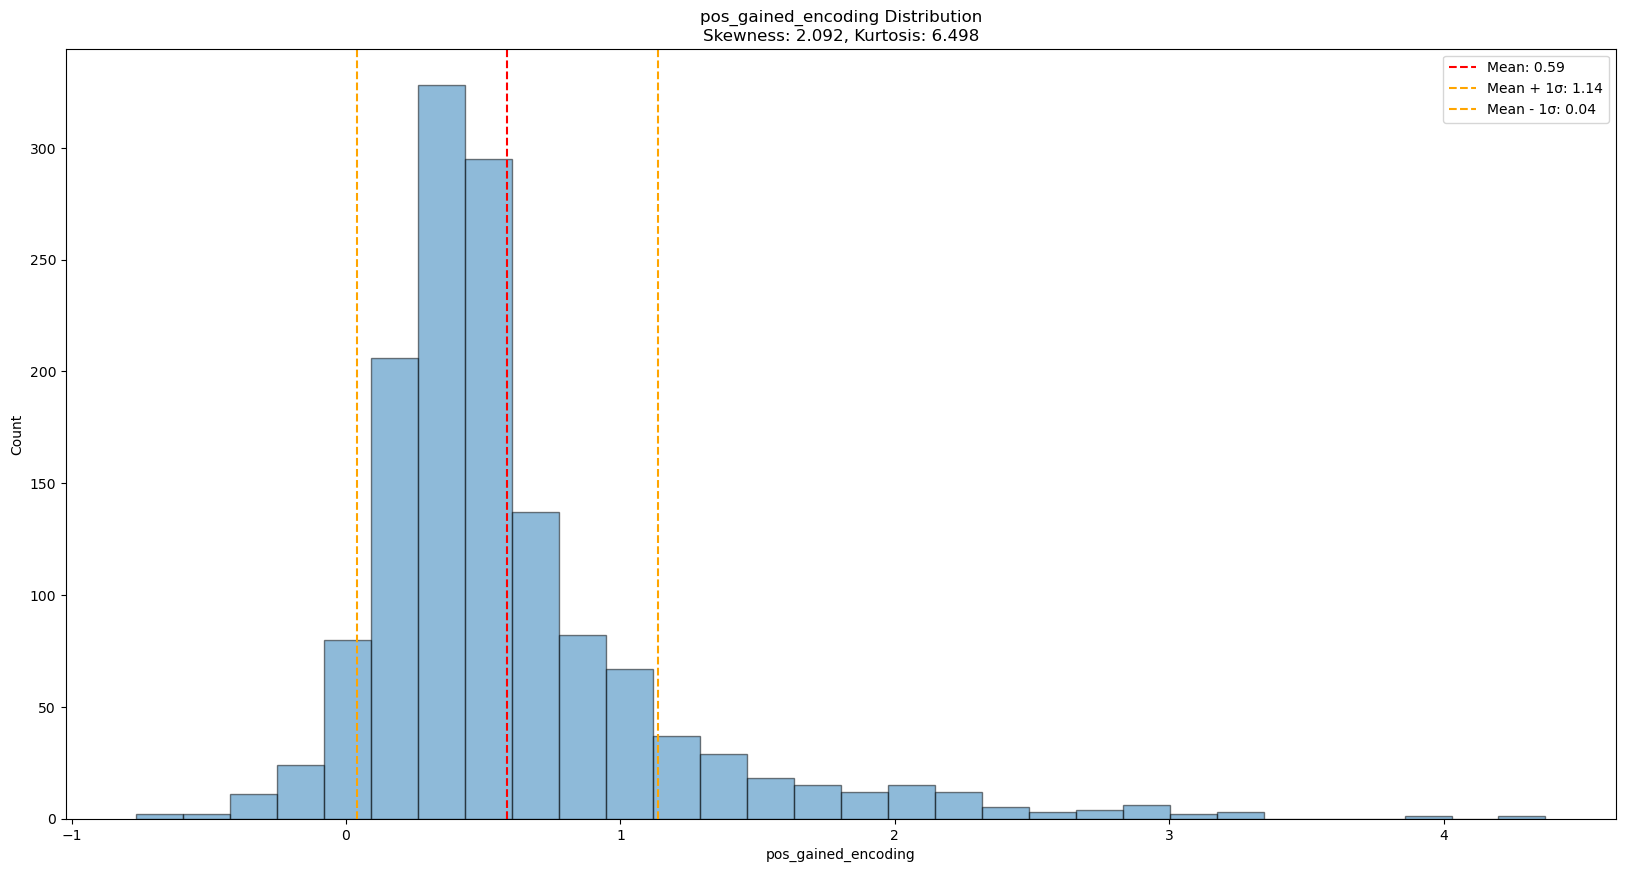

In [8]:
analysis.plot_prob_dist("pos_gained_encoding")

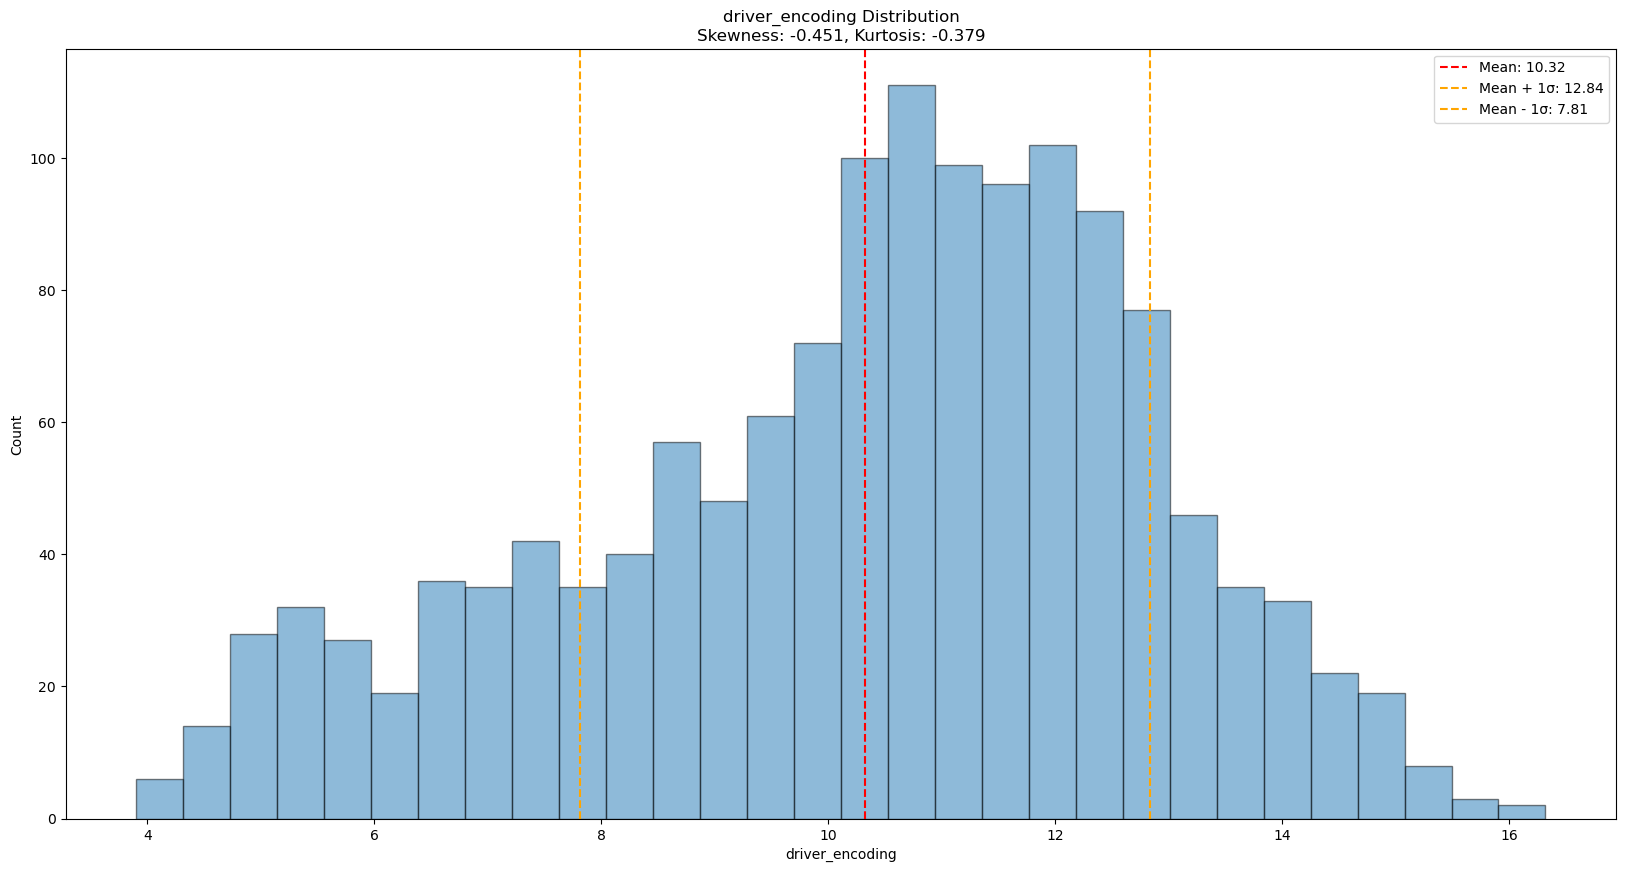

In [9]:
analysis.plot_prob_dist("driver_encoding")

In [10]:
#analysis.plot_prob_dist("lag_SpeedST")

In [11]:
#analysis.plot_prob_dist("ewa_driver_results")

In [12]:
def create_pos_gained_encoding(driver, qual_position, race_position):
    """
    # Convert inputs to lists if they're pandas Series
    if isinstance(driver, pd.Series):
        driver = driver.tolist()
    if isinstance(qual_position, pd.Series):
        qual_position = qual_position.tolist()
    if isinstance(race_position, pd.Series):
        race_position = race_position.tolist()
    """
    
    # Handle -1 in race_position
    race_position = [21 if x == -1 else x for x in race_position]
    
    # Calculate position gained
    pos_gained = [q - r for q, r in zip(qual_position, race_position)]

    def calc(x): return (1/np.log(x+1))*((21-x)/20)
    
    # Calculate finishing weights
    finishing_weight = [calc(x) for x in race_position]
    
    final = [] 
    podium_bonus = 1

    for i in range(len(pos_gained)):
        if pos_gained[i] == 0:
            adjusted_pos_gained = finishing_weight[i]
        elif pos_gained[i] > 0:
            adjusted_pos_gained = pos_gained[i]*finishing_weight[i]
        else:
            if finishing_weight[i] <= 0.0: 
                adjusted_pos_gained = pos_gained[i]*(-np.log(finishing_weight[i]+0.000001))*0.05
            else:
                adjusted_pos_gained = pos_gained[i]*(-np.log(finishing_weight[i]))*0.05
            
        if race_position[i] <= 3:
            final.append(adjusted_pos_gained + podium_bonus)
        else:
            final.append(adjusted_pos_gained)

    df = pd.DataFrame({
        "driver": driver,
        "qual_position": qual_position,
        "race_pos": race_position,
        "pos_gained": pos_gained,
        "finishing_weight": finishing_weight,
        "final": final
    }).sort_values(by="final", ascending=False)
    
    return df

In [13]:
race_results = data.loc[:, ['BroadcastName','Qual_Position','Race_Position']].iloc[20:40]
create_pos_gained_encoding(race_results["BroadcastName"],race_results["Qual_Position"],race_results["Race_Position"])

,driver,qual_position,race_pos,pos_gained,finishing_weight,final
28,S PEREZ,7.0,2.0,5.0,0.864727,5.323636
27,G RUSSELL,11.0,4.0,7.0,0.528135,3.696943
34,Y TSUNODA,16.0,7.0,9.0,0.336629,3.029660
21,M VERSTAPPEN,1.0,1.0,0.0,1.442695,2.442695
39,A ALBON,18.0,9.0,9.0,0.260577,2.345190
37,A ALBON,20.0,11.0,9.0,0.201215,1.810933
36,L NORRIS,3.0,3.0,0.0,0.649213,1.649213
33,V BOTTAS,8.0,5.0,3.0,0.446489,1.339466
25,L STROLL,15.0,10.0,5.0,0.229368,1.146839
24,P GASLY,17.0,12.0,5.0,0.175442,0.877210


In [14]:
race_results = data.loc[:, ['BroadcastName','Qual_Position','Race_Position']].iloc[0:20]
create_pos_gained_encoding(race_results["BroadcastName"],race_results["Qual_Position"],race_results["Race_Position"])

,driver,qual_position,race_pos,pos_gained,finishing_weight,final
8,G RUSSELL,6.0,3.0,3.0,0.649213,2.947638
0,C LECLERC,1.0,1.0,0.0,1.442695,2.442695
4,S PEREZ,3.0,2.0,1.0,0.864727,1.864727
18,L STROLL,20.0,12.0,8.0,0.175442,1.403536
13,A ALBON,16.0,10.0,6.0,0.229368,1.376207
3,V BOTTAS,12.0,8.0,4.0,0.295828,1.183311
1,G ZHOU,14.0,11.0,3.0,0.201215,0.603644
2,L HAMILTON,5.0,4.0,1.0,0.528135,0.528135
16,P GASLY,11.0,9.0,2.0,0.260577,0.521153
15,K MAGNUSSEN,17.0,14.0,3.0,0.129244,0.387733
